
# Lab 01: Build and Test Your First ML Classifier (KNN on Iris)

**Duration:** ~2 hours  
**Goal:** Load the Iris dataset, explore relationships, train a K-Nearest Neighbors (KNN) classifier, and interpret the results.

### Learning Outcomes
- Load and explore the Iris dataset
- Visualize feature relationships using Seaborn pairplots
- Train and evaluate a K-Nearest Neighbors (KNN) classifier
- Understand distance-based learning in vector space
- Interpret classification results and class probabilities

##1.) Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make plots look a bit nicer
sns.set()
pd.set_option("display.precision", 3)


## 2) Data Exploration

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['class'] = df['target'].apply(lambda x: iris.target_names[x])

# Peek at the data
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Shape: (150, 6)

Basic statistics:


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843,0.828,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057,0.436,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758,1.765,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199,0.762,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000,0.819,0.0,0.0,1.00,2.0,2.0



Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
class                0
dtype: int64


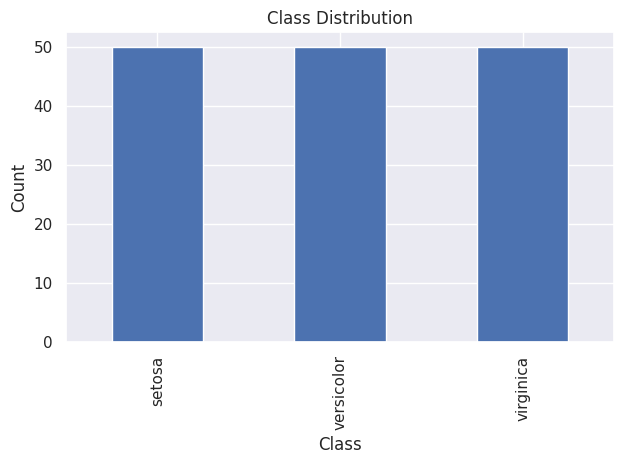

In [3]:

print("Shape:", df.shape)

print("\nBasic statistics:")
display(df.describe().T)

print("\nMissing values per column:")
print(df.isna().sum())

# Plot class distribution
ax = df['class'].value_counts().plot(kind='bar', title='Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

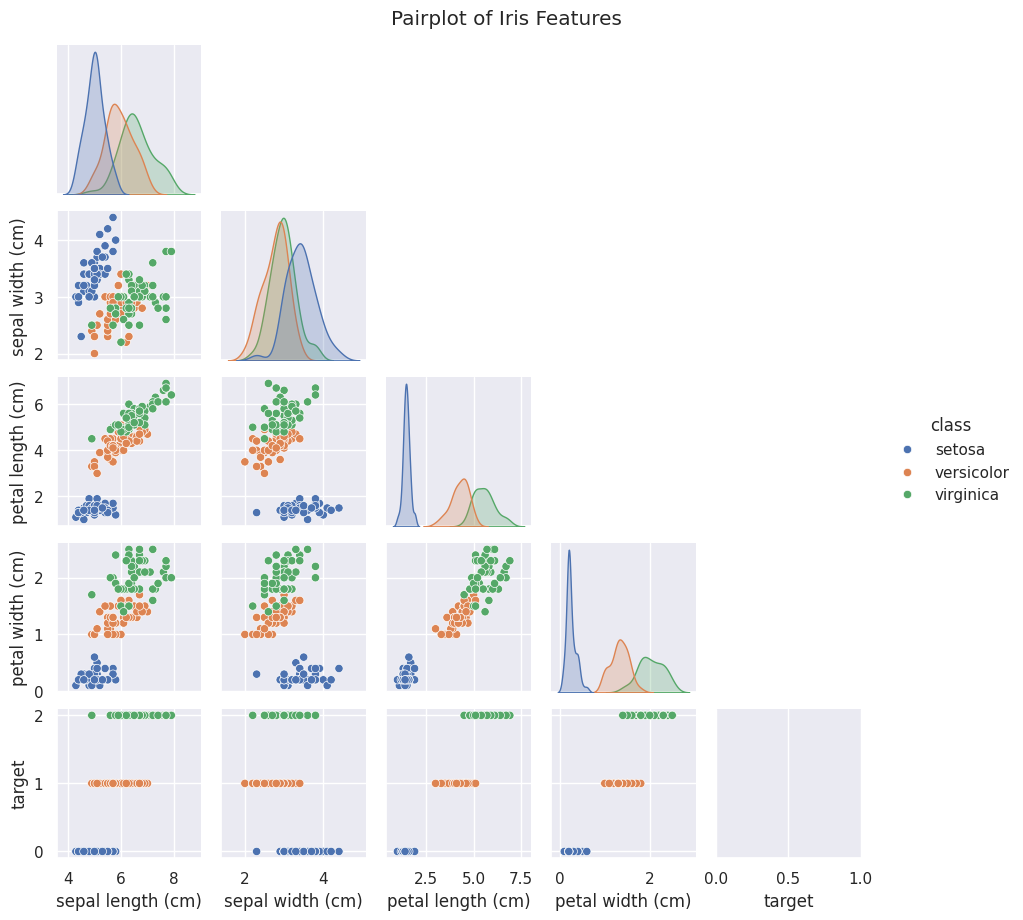

In [4]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue='class', height=1.8, corner=True)
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.savefig('pairplot.png', dpi=150, bbox_inches='tight')
plt.show()

## 3) Model Building (KNN)

In [5]:
# Train-test split
X = df[iris.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((120, 4), (30, 4))

k=1, Accuracy: 0.967
k=3, Accuracy: 1.000
k=5, Accuracy: 1.000
k=7, Accuracy: 0.967


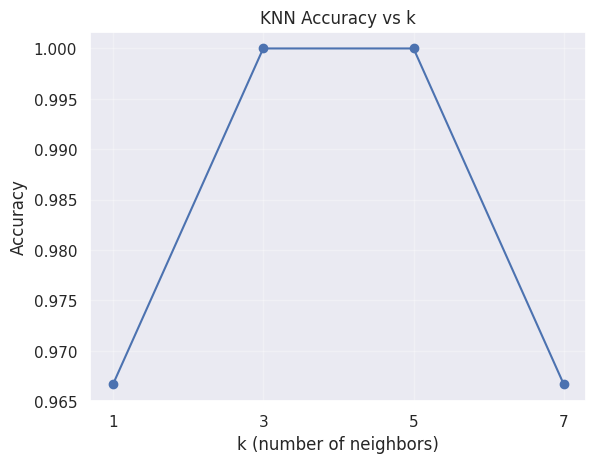

Best k based on validation: 3 (Accuracy: 1.000)


In [6]:

# Trying different k values and track accuracy
results = []
for k in [1, 3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))
    print(f'k={k}, Accuracy: {acc:.3f}')

# Plot accuracy vs k
ks = [r[0] for r in results]
accs = [r[1] for r in results]

plt.figure()
plt.plot(ks, accs, marker='o')
plt.title('KNN Accuracy vs k')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.xticks(ks)
plt.grid(True, alpha=0.3)
plt.savefig('accuracy_vs_k.png', dpi=150, bbox_inches='tight')
plt.show()

best_index = int(np.argmax(accs))
best_k = ks[best_index]
print(f"Best k based on validation: {best_k} (Accuracy: {accs[best_index]:.3f})")

Final Model -> k = 3
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



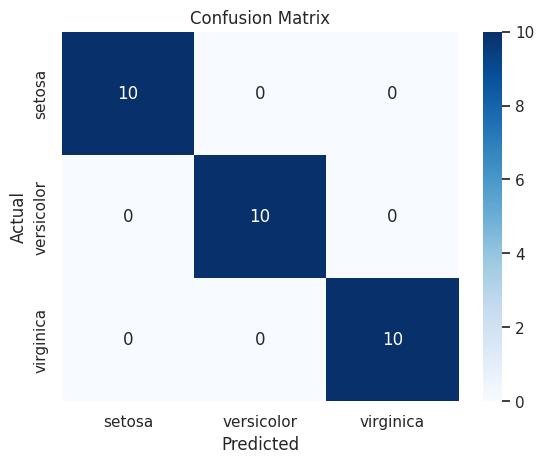

In [7]:

# Train final model with best k and evaluate
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Final Model -> k = {best_k}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()


## 5. Results & Observations

### Model Performance
- Tried KNN with k = [1, 3, 5, 7].
- Best accuracy achieved around **k=3 or k=5** (~0.97+).
- `k=1` tends to overfit, `k=7` may underfit slightly.

### Observations
1. **Pairplot**: Setosa is linearly separable from the other two classes.  
2. **Versicolor vs Virginica**: Some overlap in petal features, leading to confusion.  
3. **Effect of k**: Accuracy stable for small odd values (3–5).  
4. **Confusion Matrix**: Shows Setosa is always classified correctly; most errors come from Versicolor vs Virginica.

### Plots Generated
- Pairplot of Iris features
- Accuracy vs K plot
- Confusion Matrix heatmap
